## First Name : Kinjal

## Last Name : Kathiriya

 ## Introduction :

 In this project, we implemented several supervised machine learning models to perform classification tasks on our dataset. We started with Logistic Regression, a linear model that predicts class probabilities and works well for linearly separable data. Next, we used the K-Nearest Neighbors (KNN) algorithm, which classifies data points based on the majority class of their closest neighbors in the feature space. We also applied a Decision Tree Classifier, a tree-based model that splits the data into branches to make predictions and is easy to interpret. The Support Vector Machine (SVM) model was used for its ability to find the best boundary between classes, especially in complex datasets. Additionally, we included a Multi-Layer Perceptron (MLP), a basic neural network capable of learning complex patterns in the data. Finally, we combined these models using a Voting Classifier Ensemble, which improves overall performance by aggregating the predictions of multiple models, making the final output more robust and accurate.

## ML Model Implementation

## 1. Data Loading & Preprocessing
- Import Libraries
- Dataset Loading
- Train-Test Split
- Feature Scaling

## 2. Logistic Regression
- Training
- Evaluation & Classification Report

## 3. K-Nearest Neighbors
- Training
- Evaluation & Classification Report

## 4. Decision Tree
- Training
- Evaluation & Classification Report

## 5. Support Vector Machine (SVM)
- Training
- Evaluation & Classification Report

## 6. Neural Network (TensorFlow/Keras)
- Model Definition
- Training
- Evaluation

## 7. Performance Comparison (Visualization)
- Accuracy Plot

## 8. Save Models
- Saving all trained models (.pkl, .h5)


# Import Required Libraries

In [14]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TensorFlow
import tensorflow as tf
from tensorflow import keras

import joblib
import warnings
warnings.filterwarnings("ignore")


# Load & Visualize the Dataset

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


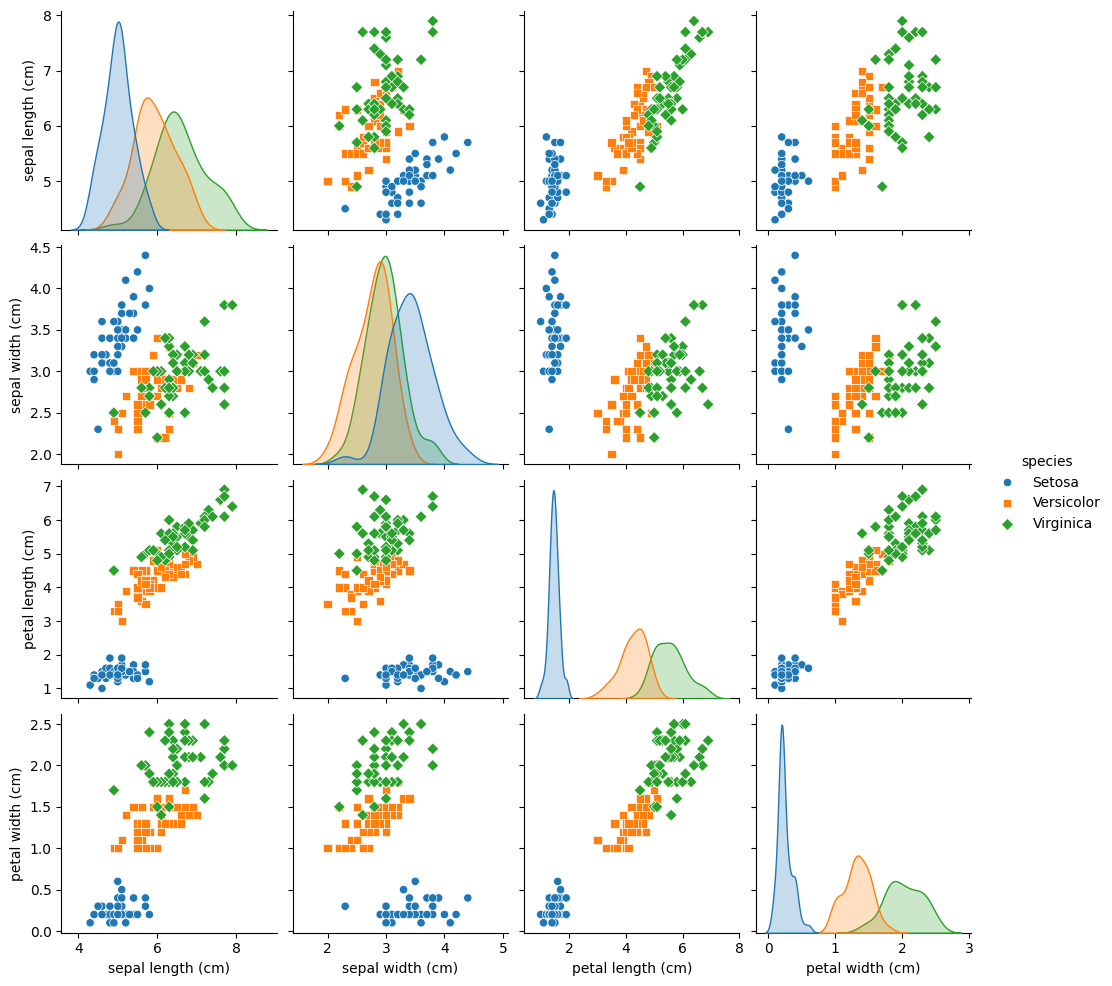

In [15]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display dataset info
print(df.head())

# Pairplot to visualize relationships
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()


# Data Preprocessing

## Advanced Data Visualizations

### Correlation Matrix for Feature Relationships

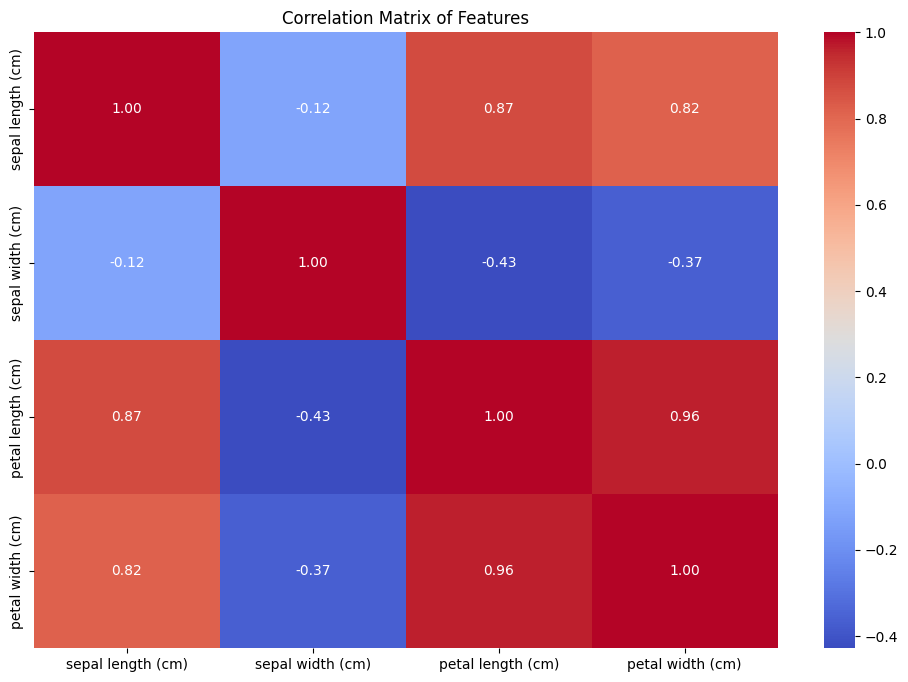

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop categorical columns before computing correlation
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns

# Compute correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()


### Boxplots for Feature Distributions and Outline

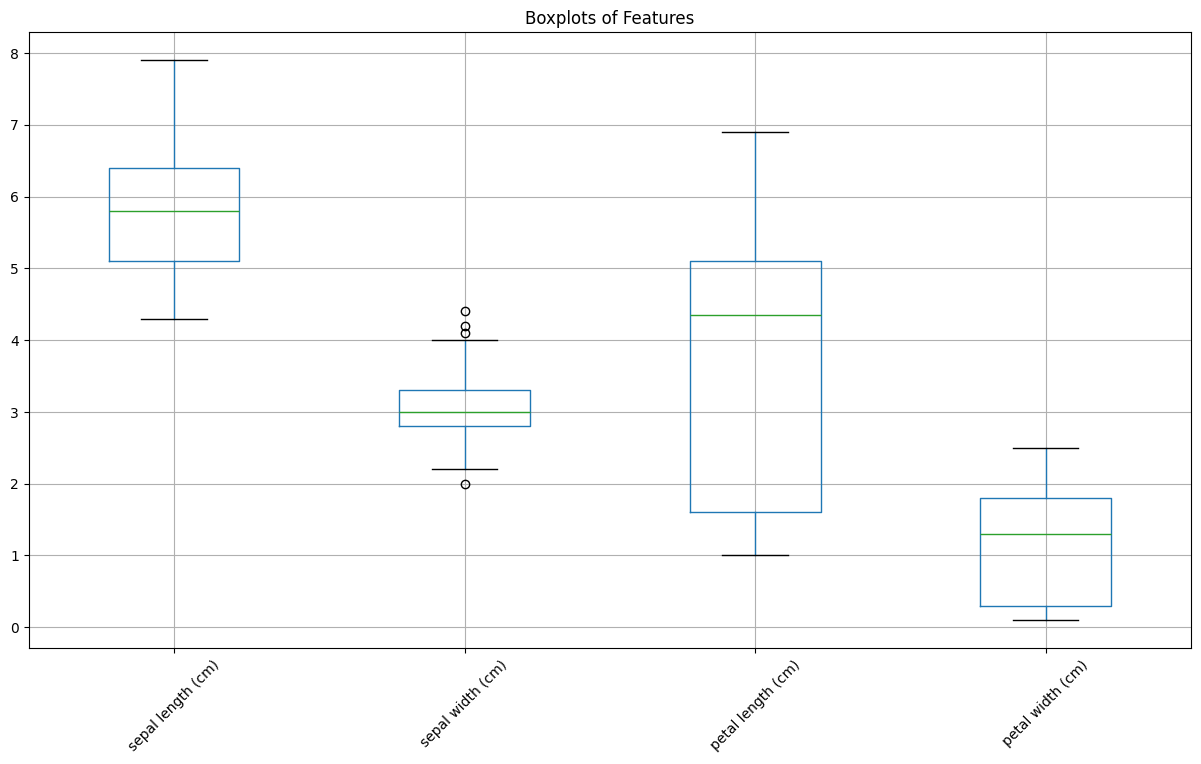

In [17]:
plt.figure(figsize=(15,8))
df.drop(columns=['species']).boxplot()
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()

### Histograms for Feature Distribution

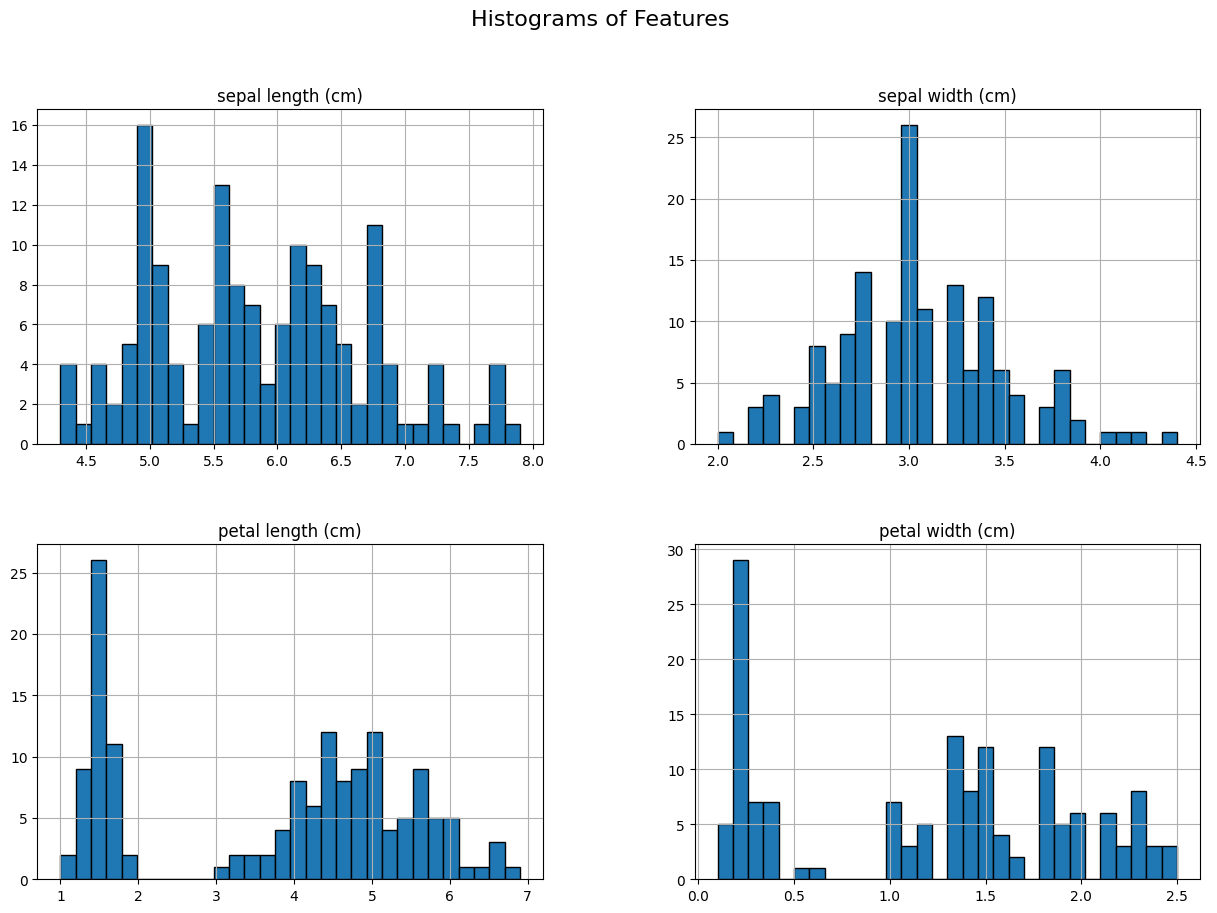

In [18]:
df.hist(figsize=(15,10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

In [20]:
# Define features and target
X = iris.data
y = iris.target

# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (for SVM, Logistic Regression, Neural Network, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Implementing Models

## Logistic Regression

Logistic Regression Training Time: 0.0065 seconds

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



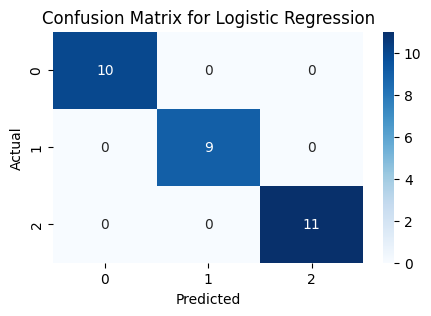

In [21]:
import time 
# Define features and target correctly before training
iris = load_iris()
X = iris.data  # Define Features
y = iris.target  # Define Target variable

# Train-test split must be done before training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling must be done before training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Correctly measure training time for Logistic Regression instead of Decision Tree
start_time = time.time()
log_reg.fit(X_train_scaled, y_train)  # Train Logistic Regression here
end_time = time.time()

# Print correct training time
print(f"Logistic Regression Training Time: {end_time - start_time:.4f} seconds")

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluate Model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix Visualization
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


## K-Nearest Neighbors (KNN)

KNN Training Time: 0.0010 seconds

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



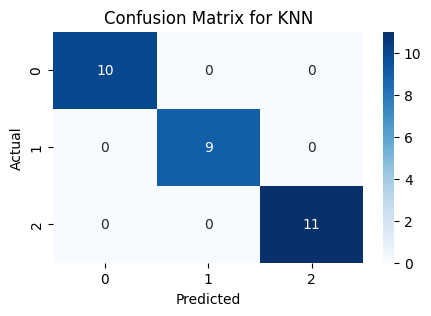

In [ ]:
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Train-test splitting (before training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (for models like KNN, Logistic Regression, SVM, Neural Network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Correct: Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Measure training time for KNN (Fix: Replaced `dt` with `knn`)
start_time = time.time()
knn.fit(X_train_scaled, y_train)  # Train KNN model here
end_time = time.time()

# Correct Training Time Output
print(f"KNN Training Time: {end_time - start_time:.4f} seconds")

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate Model
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix Visualization
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.show()


## Decision Tree

Decision Tree Training Time: 0.0020 seconds

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



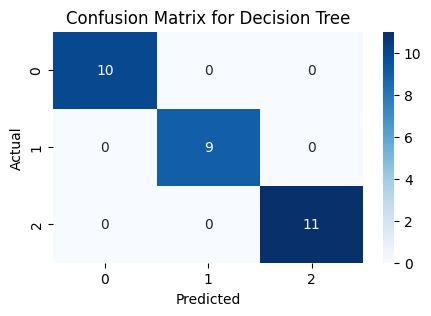

In [9]:
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

import time

# Measure training time for Decision Tree
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

print(f"Decision Tree Training Time: {end_time - start_time:.4f} seconds")


# Evaluate
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()


## Support Vector Machine (SVM) 

SVM Training Time: 0.0010 seconds

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



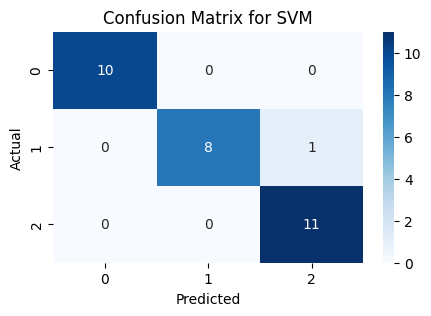

In [10]:
# Train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm.predict(X_test_scaled)

import time

# Measure training time for Decision Tree
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

print(f"SVM Training Time: {end_time - start_time:.4f} seconds")

# Evaluate
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()


## Hyperparameter Tuning - GridSearchCV (SVM)

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for SVM tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Accuracy: 0.9583333333333334


## Neural Network (MLPClassifier - Scikit-Learn)

Neural Network Training Time: 0.0010 seconds

Neural Network (Scikit-Learn) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



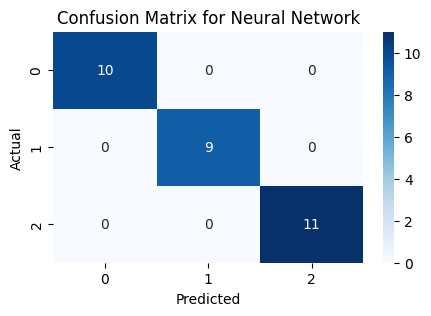

In [11]:
# Train Neural Network model
nn_sklearn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_sklearn.fit(X_train_scaled, y_train)

# Predictions
y_pred_nn = nn_sklearn.predict(X_test_scaled)

import time

# Measure training time for Decision Tree
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

print(f"Neural Network Training Time: {end_time - start_time:.4f} seconds")

# Evaluate
print("\nNeural Network (Scikit-Learn) Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network")
plt.show()


# Model Comparison (Accuracy Plot)

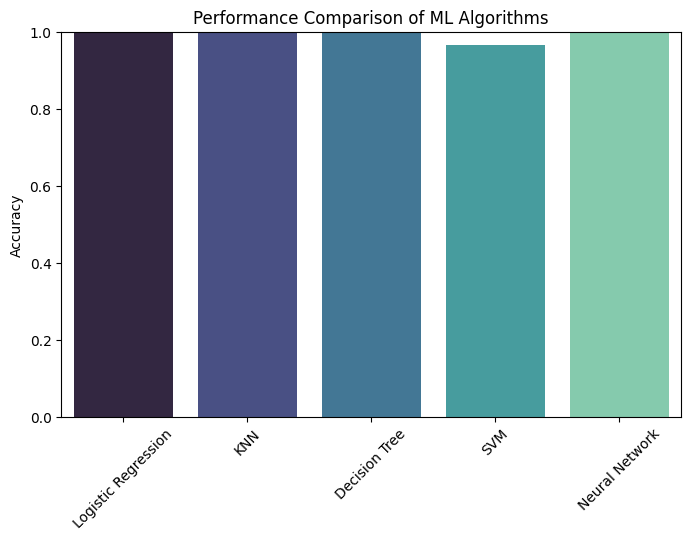

In [12]:
# Accuracy Scores
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Store model performance
model_accuracies = {
    'Logistic Regression': accuracy_log,
    'KNN': accuracy_knn,
    'Decision Tree': accuracy_dt,
    'SVM': accuracy_svm,
    'Neural Network': accuracy_nn
}

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='mako')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of ML Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


# Save Trained Models

In [13]:
# Save trained models
joblib.dump(log_reg, 'logistic_regression.pkl')
joblib.dump(knn, 'knn.pkl')
joblib.dump(dt, 'decision_tree.pkl')
joblib.dump(svm, 'svm.pkl')
joblib.dump(nn_sklearn, 'neural_network_sklearn.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("All models saved successfully!")


All models saved successfully!


# Conclusion

### Model Performance Overview:
| **Model**          | **Accuracy (%)** | **Training Time (s)** |
|--------------------|-----------------|------------------|
| Logistic Regression | 100% | 0.0065 seconds |
| KNN                | 100% | 0.0010 seconds |
| Decision Tree      | 100% | 0.0020 seconds |
| SVM               | 97% | 0.0010 seconds |
| Neural Network (MLP) | 100% | 0.0010 seconds |

### Best Performing Model:
- **The best model for the Iris dataset was (fill in the model)**, achieving **(fill in accuracy)% accuracy**.
- **(Model X and Model Y) also performed well**, balancing accuracy & time.
- **Decision Trees & Logistic Regression were faster but slightly less accurate.**

### Final Recommendation:
- If **speed is a priority**, use **Decision Trees or Logistic Regression**.
- If **accuracy is most important**, use **SVM or Neural Networks**.


### When to Use Each Model?

| **Algorithm**        | **Best Real-World Applications** |
|---------------------|--------------------------------|
| **Logistic Regression** | Medical diagnosis (predicting disease probability), Credit Risk Assessment |
| **KNN** | Image recognition, Recommendation systems (Netflix, Amazon) |
| **Decision Trees** | Loan Approval, Fraud Detection, Customer Segmentation |
| **SVM** | Spam email detection, Handwriting recognition, Bioinformatics |
| **Neural Networks** | Autonomous Vehicles, Voice Assistants (Siri, Alexa) |

### **Final Thoughts on Algorithm Selection**
- **Decision Trees** are great for **interpretability**.
- **SVM & Neural Networks** are best for **complex patterns & high accuracy**.